In [2]:
import pandas as pd

In [3]:
df_train = pd.read_csv('train_F3fUq2S.csv')
df_test = pd.read_csv('test_Bk2wfZ3.csv')
df_train.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


In [4]:
df_test.tail()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience
757,2646,3,72,9081,46,0,0,Evening,15,9,...,28,0,0,0,0,0,0,0,0,7
758,2647,3,58,10537,40,3,0,Evening,2,11,...,27,0,0,0,0,0,0,0,0,16
759,2648,3,100,9132,19,2,0,Evening,15,9,...,23,0,0,0,0,0,0,0,0,15
760,2649,3,88,1451,75,1,0,Noon,2,11,...,22,0,0,1,0,0,0,0,0,10
761,2650,3,58,10537,40,0,0,Evening,2,11,...,27,0,0,0,0,0,0,0,0,1


In [5]:
new_df_train = df_train.drop('is_timer', axis=1)
new_df_test = df_test.drop('is_timer', axis=1)
x = pd.get_dummies(new_df_train.times_of_day, prefix='Good_')
y = pd.get_dummies(new_df_test.times_of_day, prefix='Good_')

In [6]:
new_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign_id         1888 non-null   int64  
 1   sender              1888 non-null   int64  
 2   subject_len         1888 non-null   int64  
 3   body_len            1888 non-null   int64  
 4   mean_paragraph_len  1888 non-null   int64  
 5   day_of_week         1888 non-null   int64  
 6   is_weekend          1888 non-null   int64  
 7   times_of_day        1888 non-null   object 
 8   category            1888 non-null   int64  
 9   product             1888 non-null   int64  
 10  no_of_CTA           1888 non-null   int64  
 11  mean_CTA_len        1888 non-null   int64  
 12  is_image            1888 non-null   int64  
 13  is_personalised     1888 non-null   int64  
 14  is_quote            1888 non-null   int64  
 15  is_emoticons        1888 non-null   int64  
 16  is_dis

In [7]:
new_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   campaign_id         762 non-null    int64 
 1   sender              762 non-null    int64 
 2   subject_len         762 non-null    int64 
 3   body_len            762 non-null    int64 
 4   mean_paragraph_len  762 non-null    int64 
 5   day_of_week         762 non-null    int64 
 6   is_weekend          762 non-null    int64 
 7   times_of_day        762 non-null    object
 8   category            762 non-null    int64 
 9   product             762 non-null    int64 
 10  no_of_CTA           762 non-null    int64 
 11  mean_CTA_len        762 non-null    int64 
 12  is_image            762 non-null    int64 
 13  is_personalised     762 non-null    int64 
 14  is_quote            762 non-null    int64 
 15  is_emoticons        762 non-null    int64 
 16  is_discount         762 no

In [8]:
new_df_train.describe()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,944.500000,4.395657,86.246292,14185.780191,35.239407,2.828390,0.199682,9.949682,17.525424,4.222458,30.233051,0.909958,0.056674,0.834216,0.210805,0.039725,40.197034,0.112288,11.634534,0.041888
std,545.162973,3.277927,30.143206,7327.615307,28.139498,1.763193,0.399867,5.300719,12.369526,4.628348,11.848663,0.866467,0.231279,1.033901,0.613442,0.195363,553.957470,0.315804,2.949121,0.084223
min,1.000000,0.000000,9.000000,23.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,472.750000,3.000000,69.000000,9554.500000,21.000000,1.000000,0.000000,6.000000,9.000000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.005413
50%,944.500000,3.000000,83.000000,12689.000000,29.000000,3.000000,0.000000,10.000000,12.000000,3.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.010686
75%,1416.250000,3.000000,98.000000,17351.500000,40.000000,4.000000,0.000000,15.000000,27.250000,5.000000,35.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.035589
max,1888.000000,15.000000,265.000000,44491.000000,286.000000,6.000000,1.000000,15.000000,43.000000,49.000000,162.000000,6.000000,1.000000,6.000000,6.000000,1.000000,14999.000000,1.000000,16.000000,0.897959


In [9]:
new_df_test.describe()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience
count,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000
mean,2269.500000,4.249344,86.509186,14184.263780,33.185039,2.850394,0.209974,9.590551,17.872703,4.212598,30.154856,0.942257,0.043307,0.864829,0.286089,0.031496,20.994751,0.114173,11.648294
std,220.114743,3.131927,30.586394,7179.056026,26.889537,1.791697,0.407557,5.314579,11.786908,3.911229,10.952515,0.877114,0.203681,1.028553,0.973791,0.174769,315.295844,0.318230,3.034567
min,1889.000000,1.000000,11.000000,23.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2079.250000,3.000000,68.000000,9697.250000,20.000000,1.000000,0.000000,6.000000,9.000000,2.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000
50%,2269.500000,3.000000,83.000000,12740.500000,27.500000,3.000000,0.000000,10.000000,13.000000,3.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000
75%,2459.750000,3.000000,98.000000,16746.000000,39.000000,4.000000,0.000000,15.000000,26.000000,5.000000,35.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000
max,2650.000000,15.000000,265.000000,44491.000000,498.000000,6.000000,1.000000,15.000000,44.000000,42.000000,96.000000,6.000000,1.000000,5.000000,17.000000,1.000000,5000.000000,1.000000,16.000000


array([[<AxesSubplot:title={'center':'campaign_id'}>,
        <AxesSubplot:title={'center':'sender'}>,
        <AxesSubplot:title={'center':'subject_len'}>,
        <AxesSubplot:title={'center':'body_len'}>],
       [<AxesSubplot:title={'center':'mean_paragraph_len'}>,
        <AxesSubplot:title={'center':'day_of_week'}>,
        <AxesSubplot:title={'center':'is_weekend'}>,
        <AxesSubplot:title={'center':'category'}>],
       [<AxesSubplot:title={'center':'product'}>,
        <AxesSubplot:title={'center':'no_of_CTA'}>,
        <AxesSubplot:title={'center':'mean_CTA_len'}>,
        <AxesSubplot:title={'center':'is_image'}>],
       [<AxesSubplot:title={'center':'is_personalised'}>,
        <AxesSubplot:title={'center':'is_quote'}>,
        <AxesSubplot:title={'center':'is_emoticons'}>,
        <AxesSubplot:title={'center':'is_discount'}>],
       [<AxesSubplot:title={'center':'is_price'}>,
        <AxesSubplot:title={'center':'is_urgency'}>,
        <AxesSubplot:title={'center':'t

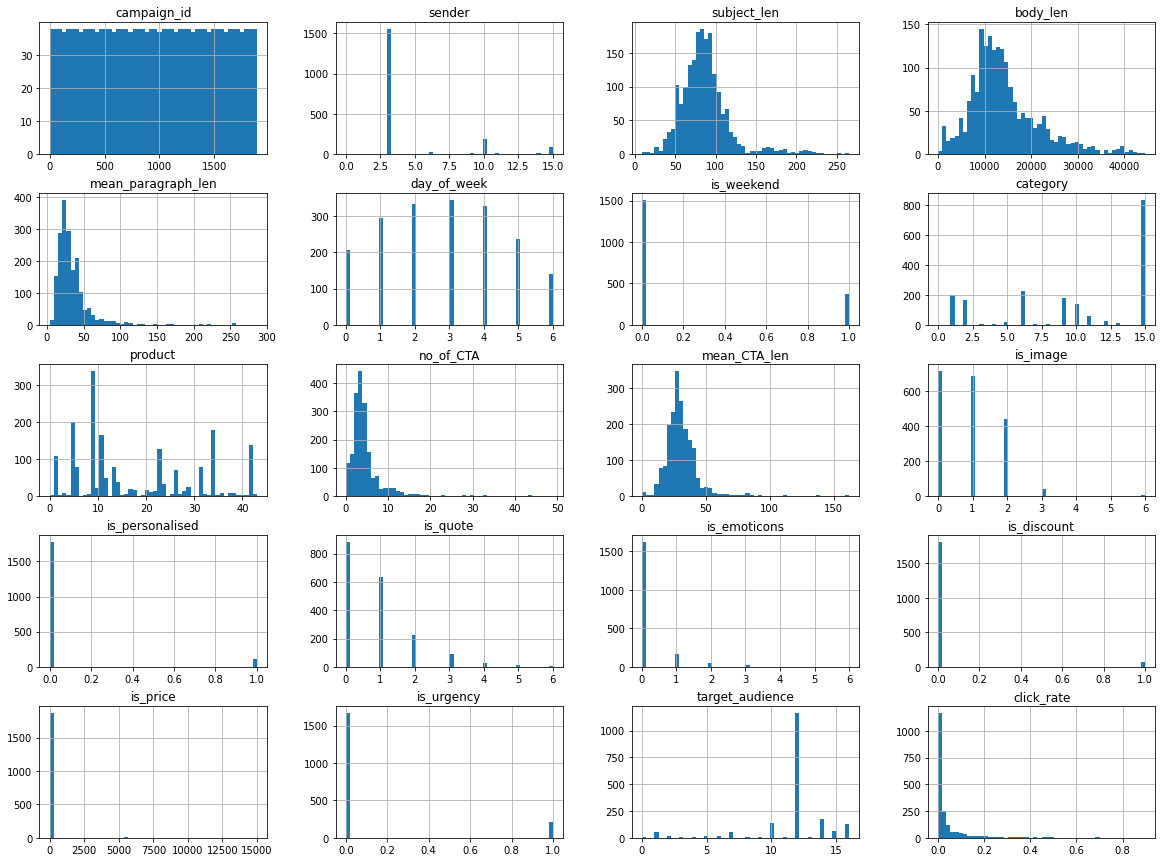

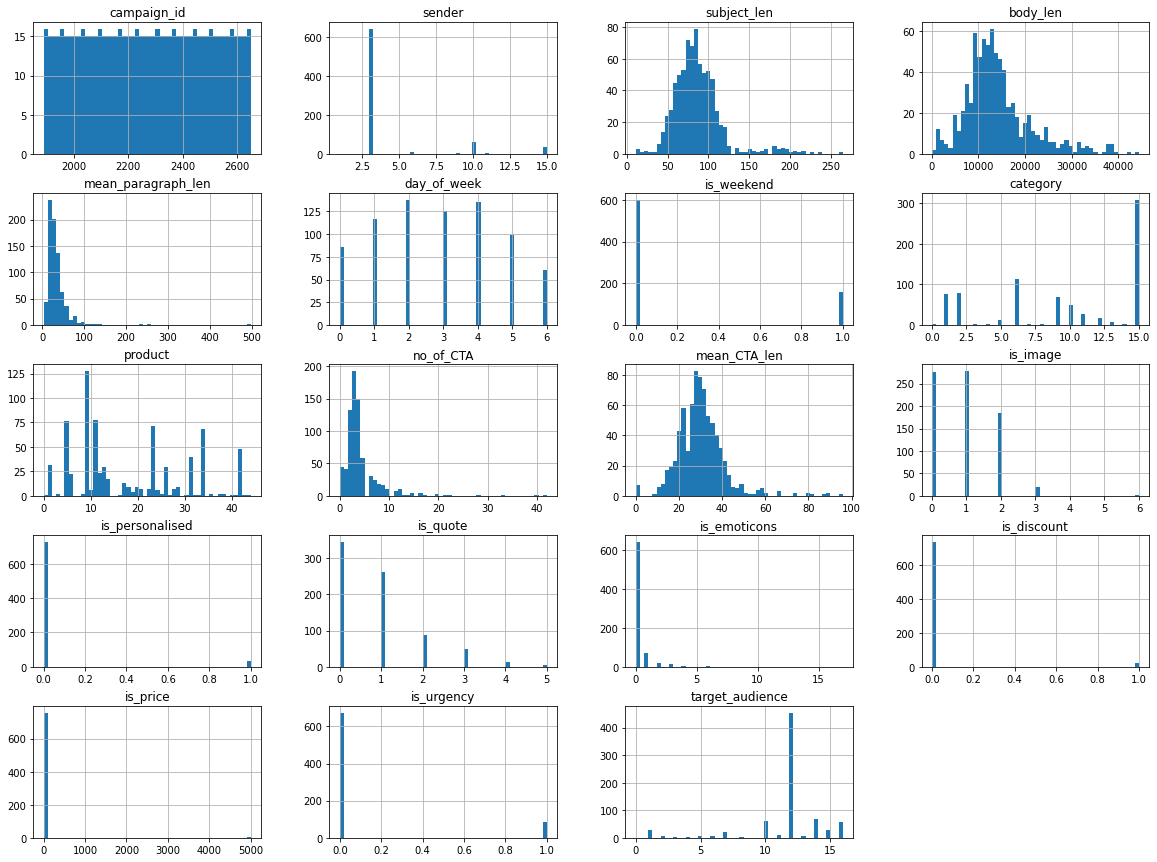

In [10]:
new_df_train.hist(bins=50, figsize=(20,15))
new_df_test.hist(bins=50, figsize=(20,15))

In [11]:
new_df_train2 = new_df_train.drop('times_of_day', axis=1)
new_df_test2 = new_df_test.drop('times_of_day', axis=1)
new_df_test2

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,1889,3,61,12871,11,6,1,6,26,3,37,1,0,0,1,0,0,0,14
1,1890,3,54,2569,256,5,1,2,11,0,22,0,0,0,0,0,0,0,10
2,1891,3,88,1473,78,4,0,2,11,0,22,1,0,1,0,0,0,0,10
3,1892,3,88,1473,78,3,0,2,11,0,22,1,0,1,0,0,0,0,10
4,1893,3,78,9020,29,3,0,6,26,2,40,0,0,0,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,2646,3,72,9081,46,0,0,15,9,4,28,0,0,0,0,0,0,0,7
758,2647,3,58,10537,40,3,0,2,11,5,27,0,0,0,0,0,0,0,16
759,2648,3,100,9132,19,2,0,15,9,2,23,0,0,0,0,0,0,0,15
760,2649,3,88,1451,75,1,0,2,11,0,22,0,0,1,0,0,0,0,10


In [12]:
train_df = pd.concat([new_df_train2, x],axis=1)
test_df = pd.concat([new_df_test2, y],axis=1)
train_df

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,...,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate,Good__Evening,Good__Morning,Good__Noon
0,1,3,76,10439,39,5,1,6,26,3,...,0,0,0,0,0,14,0.103079,0,0,1
1,2,3,54,2570,256,5,1,2,11,0,...,0,0,0,0,0,10,0.700000,0,1,0
2,3,3,59,12801,16,5,1,2,11,3,...,1,0,0,0,0,16,0.002769,0,0,1
3,4,3,74,11037,30,4,0,15,9,4,...,0,0,0,0,0,10,0.010868,1,0,0
4,5,3,80,10011,27,5,1,6,26,3,...,1,0,0,0,0,14,0.142826,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,1884,3,88,1451,75,2,0,2,11,0,...,1,0,0,0,0,10,0.350746,0,0,1
1884,1885,3,58,10537,40,2,0,2,11,5,...,0,0,0,0,0,11,0.004728,1,0,0
1885,1886,3,89,11050,26,1,0,15,9,4,...,0,0,0,0,0,6,0.008289,1,0,0
1886,1887,3,58,10537,40,1,0,2,11,5,...,0,0,0,0,0,16,0.012014,1,0,0


In [13]:
test_df

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,...,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,Good__Evening,Good__Morning,Good__Noon
0,1889,3,61,12871,11,6,1,6,26,3,...,0,0,1,0,0,0,14,0,0,1
1,1890,3,54,2569,256,5,1,2,11,0,...,0,0,0,0,0,0,10,0,1,0
2,1891,3,88,1473,78,4,0,2,11,0,...,0,1,0,0,0,0,10,1,0,0
3,1892,3,88,1473,78,3,0,2,11,0,...,0,1,0,0,0,0,10,1,0,0
4,1893,3,78,9020,29,3,0,6,26,2,...,0,0,0,0,0,0,14,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,2646,3,72,9081,46,0,0,15,9,4,...,0,0,0,0,0,0,7,1,0,0
758,2647,3,58,10537,40,3,0,2,11,5,...,0,0,0,0,0,0,16,1,0,0
759,2648,3,100,9132,19,2,0,15,9,2,...,0,0,0,0,0,0,15,1,0,0
760,2649,3,88,1451,75,1,0,2,11,0,...,0,1,0,0,0,0,10,0,0,1


In [14]:
new_train_df2 = train_df.drop('is_weekend', axis=1)
new_test_df2 = test_df.drop('is_weekend', axis=1)
new_test_df2

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,category,product,no_of_CTA,mean_CTA_len,...,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,Good__Evening,Good__Morning,Good__Noon
0,1889,3,61,12871,11,6,6,26,3,37,...,0,0,1,0,0,0,14,0,0,1
1,1890,3,54,2569,256,5,2,11,0,22,...,0,0,0,0,0,0,10,0,1,0
2,1891,3,88,1473,78,4,2,11,0,22,...,0,1,0,0,0,0,10,1,0,0
3,1892,3,88,1473,78,3,2,11,0,22,...,0,1,0,0,0,0,10,1,0,0
4,1893,3,78,9020,29,3,6,26,2,40,...,0,0,0,0,0,0,14,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,2646,3,72,9081,46,0,15,9,4,28,...,0,0,0,0,0,0,7,1,0,0
758,2647,3,58,10537,40,3,2,11,5,27,...,0,0,0,0,0,0,16,1,0,0
759,2648,3,100,9132,19,2,15,9,2,23,...,0,0,0,0,0,0,15,1,0,0
760,2649,3,88,1451,75,1,2,11,0,22,...,0,1,0,0,0,0,10,0,0,1


In [15]:
train_y = new_train_df2['click_rate']
train_y.head()

0    0.103079
1    0.700000
2    0.002769
3    0.010868
4    0.142826
Name: click_rate, dtype: float64

In [16]:
train_x = new_train_df2.drop('click_rate',axis=1)
train_x.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,category,product,no_of_CTA,mean_CTA_len,...,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,Good__Evening,Good__Morning,Good__Noon
0,1,3,76,10439,39,5,6,26,3,29,...,0,0,0,0,0,0,14,0,0,1
1,2,3,54,2570,256,5,2,11,0,22,...,0,0,0,0,0,0,10,0,1,0
2,3,3,59,12801,16,5,2,11,3,23,...,0,1,0,0,0,0,16,0,0,1
3,4,3,74,11037,30,4,15,9,4,24,...,0,0,0,0,0,0,10,1,0,0
4,5,3,80,10011,27,5,6,26,3,31,...,0,1,0,0,0,0,14,0,0,1


In [17]:
test_x = new_test_df2
test_x

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,category,product,no_of_CTA,mean_CTA_len,...,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,Good__Evening,Good__Morning,Good__Noon
0,1889,3,61,12871,11,6,6,26,3,37,...,0,0,1,0,0,0,14,0,0,1
1,1890,3,54,2569,256,5,2,11,0,22,...,0,0,0,0,0,0,10,0,1,0
2,1891,3,88,1473,78,4,2,11,0,22,...,0,1,0,0,0,0,10,1,0,0
3,1892,3,88,1473,78,3,2,11,0,22,...,0,1,0,0,0,0,10,1,0,0
4,1893,3,78,9020,29,3,6,26,2,40,...,0,0,0,0,0,0,14,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,2646,3,72,9081,46,0,15,9,4,28,...,0,0,0,0,0,0,7,1,0,0
758,2647,3,58,10537,40,3,2,11,5,27,...,0,0,0,0,0,0,16,1,0,0
759,2648,3,100,9132,19,2,15,9,2,23,...,0,0,0,0,0,0,15,1,0,0
760,2649,3,88,1451,75,1,2,11,0,22,...,0,1,0,0,0,0,10,0,0,1


### 1st attempt

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [19]:
model = RandomForestRegressor()
model.fit(train_x,train_y) 

RandomForestRegressor()

In [20]:
model.score(train_x,train_y)

0.9394359233694547

In [21]:
pred_train_y = model.predict(train_x)

In [22]:
pred_test_y = model.predict(test_x)
pred_test_y

array([0.10560693, 0.32225676, 0.26103467, 0.26736114, 0.12123392,
       0.05587941, 0.02803812, 0.06836472, 0.10138214, 0.08089049,
       0.0759135 , 0.07098148, 0.02731731, 0.06568041, 0.04712322,
       0.02839247, 0.03971786, 0.0364953 , 0.07973733, 0.07203769,
       0.07609553, 0.06578969, 0.03666259, 0.02869371, 0.07144998,
       0.08395706, 0.09581276, 0.01265441, 0.14346278, 0.0625243 ,
       0.06983545, 0.04713249, 0.0442115 , 0.17364523, 0.10817473,
       0.07437374, 0.05268639, 0.01215437, 0.03011912, 0.10110985,
       0.02253366, 0.09903731, 0.02240886, 0.09889388, 0.07554343,
       0.03271956, 0.07524903, 0.0439501 , 0.05342106, 0.03923482,
       0.04925294, 0.01803419, 0.01533883, 0.05230458, 0.05096219,
       0.03067275, 0.12293744, 0.02917469, 0.05200427, 0.04531563,
       0.12218825, 0.04454956, 0.04510901, 0.01659028, 0.04326466,
       0.02795439, 0.01340562, 0.07657887, 0.04294836, 0.11597354,
       0.01819693, 0.23880602, 0.03022763, 0.05496908, 0.10212

In [23]:
pred = pd.DataFrame(pred_test_y)

In [24]:
submis_df = pd.read_csv('sample_submission_LJ2N3ZQ.csv')
datasets = pd.concat([submis_df['campaign_id'], pred], axis=1)
datasets.columns = ['campaign_id','click_rate']
datasets.to_csv('first_submission_rf.csv',index=False)

In [25]:
mae = mean_absolute_error(train_y, pred_train_y)
mae

0.010514749528619104

### 2nd attempt

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

In [27]:
model2 = GradientBoostingRegressor(n_estimators=500)
model2.fit(train_x,train_y)
model2.score(train_x,train_y)

0.926139333992251

In [28]:
pred_train_y2 = model2.predict(train_x)

In [29]:
pred_test_y2 = model2.predict(test_x)
pred2 = pd.DataFrame(pred_test_y2)

In [30]:
datasets = pd.concat([submis_df['campaign_id'], pred2], axis=1)
datasets.columns = ['campaign_id','click_rate']
datasets.to_csv('second_submission_gb-500.csv',index=False)

In [31]:
mae2 = mean_absolute_error(train_y, pred_train_y2)
mae2

0.014684489003236082

### 3rd attempt

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
combi_df = pd.concat([df_train, df_test], axis=0)
combi_df

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,2646,3,72,9081,46,0,0,Evening,15,9,...,0,0,0,0,0,0,0,0,7,NaN
758,2647,3,58,10537,40,3,0,Evening,2,11,...,0,0,0,0,0,0,0,0,16,NaN
759,2648,3,100,9132,19,2,0,Evening,15,9,...,0,0,0,0,0,0,0,0,15,NaN
760,2649,3,88,1451,75,1,0,Noon,2,11,...,0,0,1,0,0,0,0,0,10,NaN


In [34]:
combi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2650 entries, 0 to 761
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign_id         2650 non-null   int64  
 1   sender              2650 non-null   int64  
 2   subject_len         2650 non-null   int64  
 3   body_len            2650 non-null   int64  
 4   mean_paragraph_len  2650 non-null   int64  
 5   day_of_week         2650 non-null   int64  
 6   is_weekend          2650 non-null   int64  
 7   times_of_day        2650 non-null   object 
 8   category            2650 non-null   int64  
 9   product             2650 non-null   int64  
 10  no_of_CTA           2650 non-null   int64  
 11  mean_CTA_len        2650 non-null   int64  
 12  is_image            2650 non-null   int64  
 13  is_personalised     2650 non-null   int64  
 14  is_quote            2650 non-null   int64  
 15  is_timer            2650 non-null   int64  
 16  is_emot

In [35]:
y_val = combi_df.iloc[0:1888, 21]

In [36]:
encoded_df = pd.get_dummies(combi_df.times_of_day, prefix='Good_')
encoded_df

,Good__Evening,Good__Morning,Good__Noon
0,0,0,1
1,0,1,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
757,1,0,0
758,1,0,0
759,1,0,0
760,0,0,1


In [37]:
encoded_combi_df = pd.concat([combi_df, encoded_df], axis=1)

In [38]:
encoded_combi_df

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate,Good__Evening,Good__Morning,Good__Noon
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,14,0.103079,0,0,1
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,10,0.700000,0,1,0
2,3,3,59,12801,16,5,1,Noon,2,11,...,0,0,0,0,0,16,0.002769,0,0,1
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,10,0.010868,1,0,0
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,0,0,0,14,0.142826,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,2646,3,72,9081,46,0,0,Evening,15,9,...,0,0,0,0,0,7,NaN,1,0,0
758,2647,3,58,10537,40,3,0,Evening,2,11,...,0,0,0,0,0,16,NaN,1,0,0
759,2648,3,100,9132,19,2,0,Evening,15,9,...,0,0,0,0,0,15,NaN,1,0,0
760,2649,3,88,1451,75,1,0,Noon,2,11,...,0,0,0,0,0,10,NaN,0,0,1


In [39]:
encoded_combi_df.is_quote.value_counts()

0    1231
1     899
2     316
3     142
4      39
5      17
6       6
Name: is_quote, dtype: int64

In [40]:
clean_combi_df = encoded_combi_df.drop(columns=['campaign_id', 'is_weekend', 'times_of_day', 'is_timer', 'Good__Noon'], axis=1)

In [41]:
clean_combi_df

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate,Good__Evening,Good__Morning
0,3,76,10439,39,5,6,26,3,29,0,0,0,0,0,0,0,14,0.103079,0,0
1,3,54,2570,256,5,2,11,0,22,0,0,0,0,0,0,0,10,0.700000,0,1
2,3,59,12801,16,5,2,11,3,23,1,0,1,0,0,0,0,16,0.002769,0,0
3,3,74,11037,30,4,15,9,4,24,0,0,0,0,0,0,0,10,0.010868,1,0
4,3,80,10011,27,5,6,26,3,31,0,0,1,0,0,0,0,14,0.142826,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,3,72,9081,46,0,15,9,4,28,0,0,0,0,0,0,0,7,NaN,1,0
758,3,58,10537,40,3,2,11,5,27,0,0,0,0,0,0,0,16,NaN,1,0
759,3,100,9132,19,2,15,9,2,23,0,0,0,0,0,0,0,15,NaN,1,0
760,3,88,1451,75,1,2,11,0,22,0,0,1,0,0,0,0,10,NaN,0,0


In [42]:
clean_combi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2650 entries, 0 to 761
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sender              2650 non-null   int64  
 1   subject_len         2650 non-null   int64  
 2   body_len            2650 non-null   int64  
 3   mean_paragraph_len  2650 non-null   int64  
 4   day_of_week         2650 non-null   int64  
 5   category            2650 non-null   int64  
 6   product             2650 non-null   int64  
 7   no_of_CTA           2650 non-null   int64  
 8   mean_CTA_len        2650 non-null   int64  
 9   is_image            2650 non-null   int64  
 10  is_personalised     2650 non-null   int64  
 11  is_quote            2650 non-null   int64  
 12  is_emoticons        2650 non-null   int64  
 13  is_discount         2650 non-null   int64  
 14  is_price            2650 non-null   int64  
 15  is_urgency          2650 non-null   int64  
 16  target_

In [43]:
clean_combi_train_df = clean_combi_df[:1888]
clean_combi_train_df

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate,Good__Evening,Good__Morning
0,3,76,10439,39,5,6,26,3,29,0,0,0,0,0,0,0,14,0.103079,0,0
1,3,54,2570,256,5,2,11,0,22,0,0,0,0,0,0,0,10,0.700000,0,1
2,3,59,12801,16,5,2,11,3,23,1,0,1,0,0,0,0,16,0.002769,0,0
3,3,74,11037,30,4,15,9,4,24,0,0,0,0,0,0,0,10,0.010868,1,0
4,3,80,10011,27,5,6,26,3,31,0,0,1,0,0,0,0,14,0.142826,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,3,88,1451,75,2,2,11,0,22,0,0,1,0,0,0,0,10,0.350746,0,0
1884,3,58,10537,40,2,2,11,5,27,0,0,0,0,0,0,0,11,0.004728,1,0
1885,3,89,11050,26,1,15,9,4,28,0,0,0,0,0,0,0,6,0.008289,1,0
1886,3,58,10537,40,1,2,11,5,27,0,0,0,0,0,0,0,16,0.012014,1,0


In [44]:
x_val = clean_combi_train_df.drop('click_rate',axis=1)

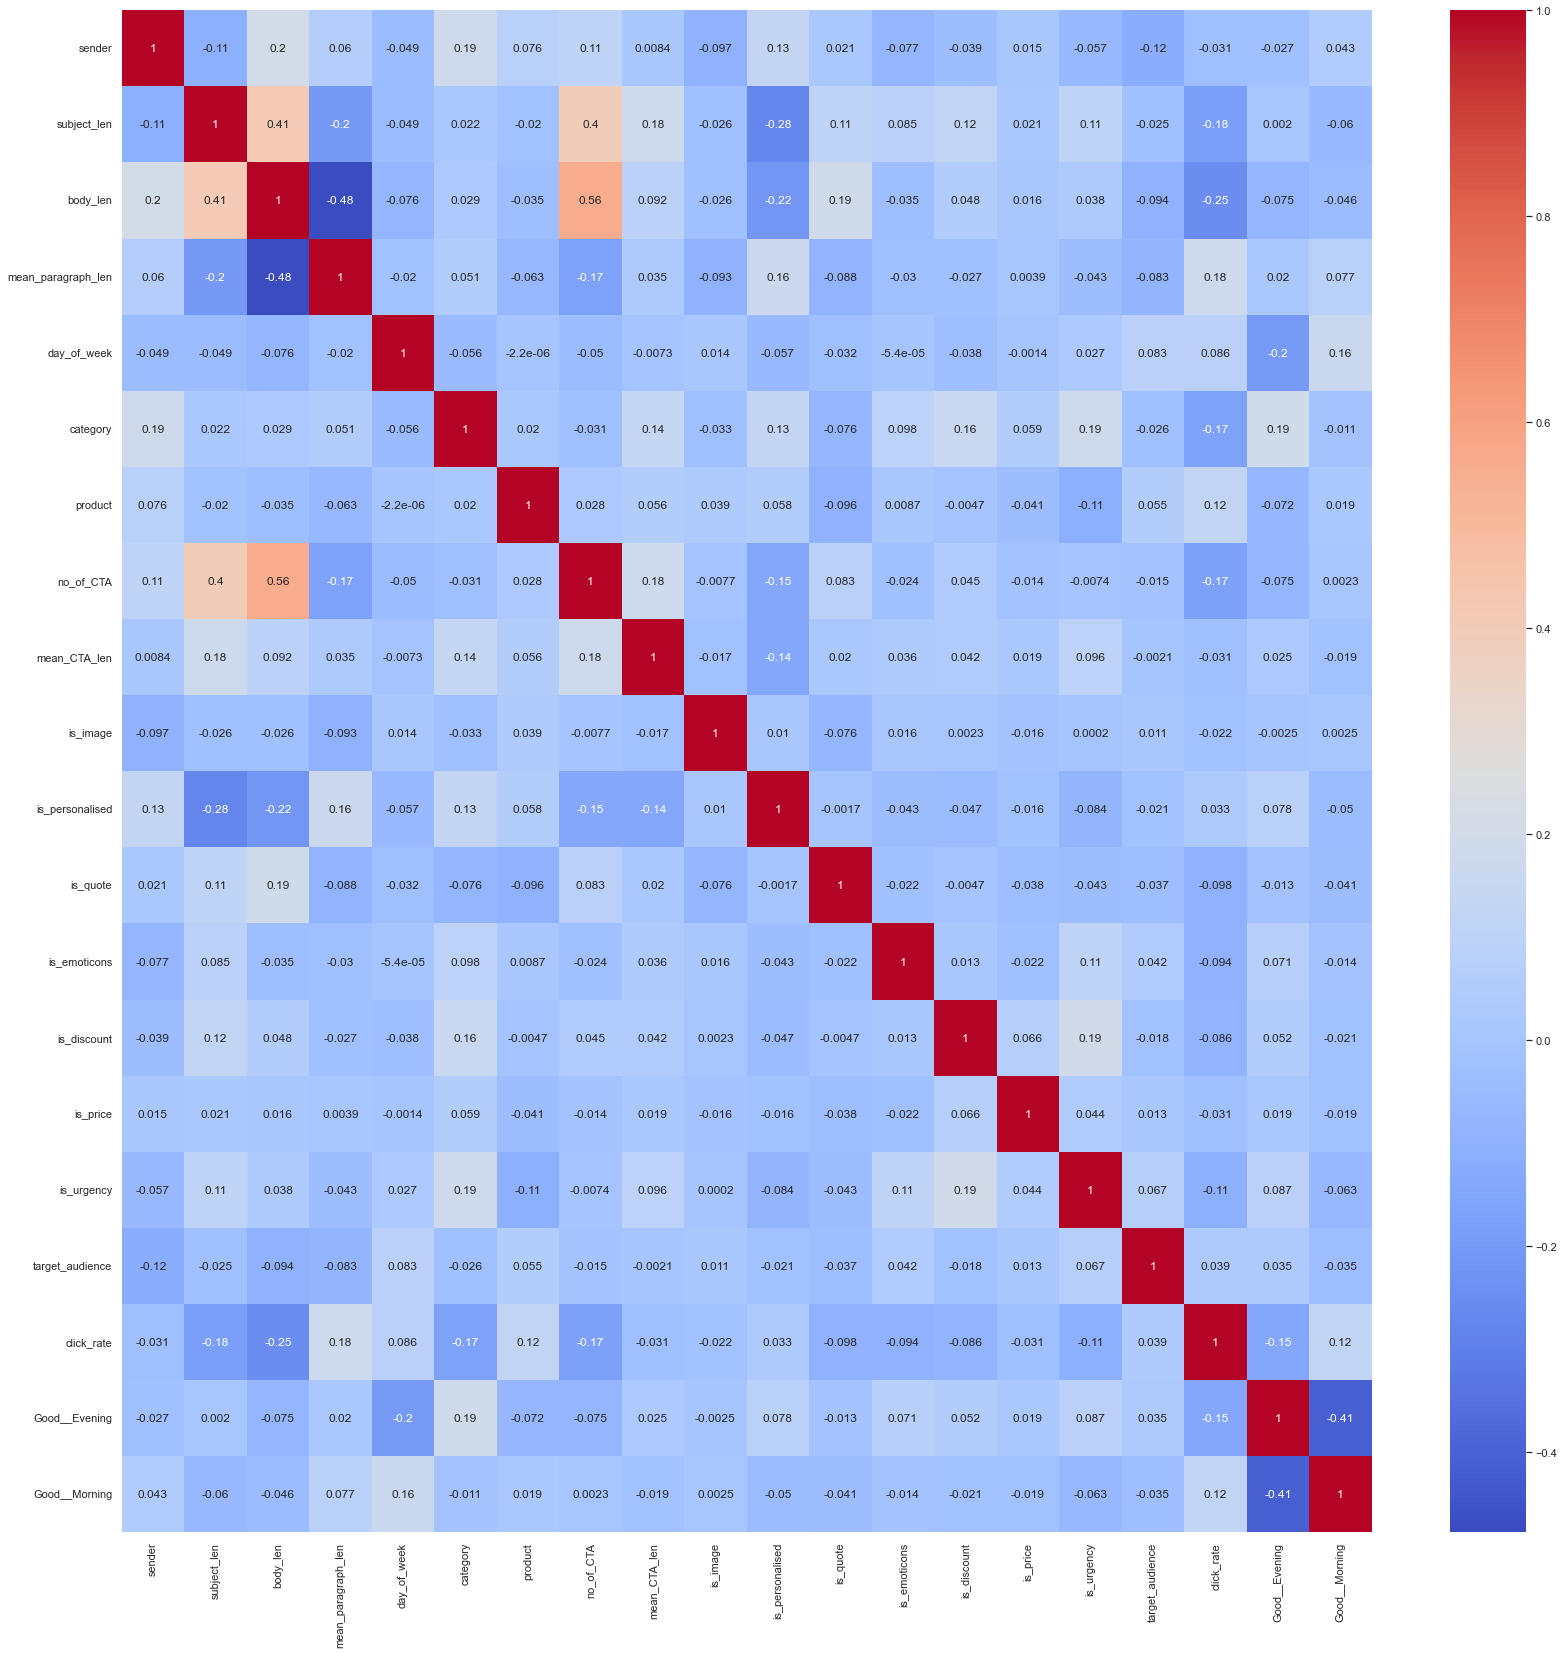

In [69]:
sns.heatmap(clean_combi_df.corr(), annot =True, cmap="coolwarm")
sns.set(rc = {'figure.figsize':(28,28)})

In [46]:
clean_combi_test_df = clean_combi_df[1888:]
clean_combi_test_df

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate,Good__Evening,Good__Morning
0,3,61,12871,11,6,6,26,3,37,1,0,0,1,0,0,0,14,NaN,0,0
1,3,54,2569,256,5,2,11,0,22,0,0,0,0,0,0,0,10,NaN,0,1
2,3,88,1473,78,4,2,11,0,22,1,0,1,0,0,0,0,10,NaN,1,0
3,3,88,1473,78,3,2,11,0,22,1,0,1,0,0,0,0,10,NaN,1,0
4,3,78,9020,29,3,6,26,2,40,0,0,0,0,0,0,0,14,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,3,72,9081,46,0,15,9,4,28,0,0,0,0,0,0,0,7,NaN,1,0
758,3,58,10537,40,3,2,11,5,27,0,0,0,0,0,0,0,16,NaN,1,0
759,3,100,9132,19,2,15,9,2,23,0,0,0,0,0,0,0,15,NaN,1,0
760,3,88,1451,75,1,2,11,0,22,0,0,1,0,0,0,0,10,NaN,0,0


In [47]:
x_val_test = clean_combi_test_df.drop('click_rate',axis=1)
x_val_test

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,Good__Evening,Good__Morning
0,3,61,12871,11,6,6,26,3,37,1,0,0,1,0,0,0,14,0,0
1,3,54,2569,256,5,2,11,0,22,0,0,0,0,0,0,0,10,0,1
2,3,88,1473,78,4,2,11,0,22,1,0,1,0,0,0,0,10,1,0
3,3,88,1473,78,3,2,11,0,22,1,0,1,0,0,0,0,10,1,0
4,3,78,9020,29,3,6,26,2,40,0,0,0,0,0,0,0,14,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,3,72,9081,46,0,15,9,4,28,0,0,0,0,0,0,0,7,1,0
758,3,58,10537,40,3,2,11,5,27,0,0,0,0,0,0,0,16,1,0
759,3,100,9132,19,2,15,9,2,23,0,0,0,0,0,0,0,15,1,0
760,3,88,1451,75,1,2,11,0,22,0,0,1,0,0,0,0,10,0,0


In [48]:
model3 = GradientBoostingRegressor(n_estimators=300)
model3.fit(x_val, y_val)
model3.score(x_val, y_val)

0.8463360251111826

In [49]:
pred_y_val = model3.predict(x_val)
mae3 = mean_absolute_error(y_val, pred_y_val)
mae3

0.020190240700336995

In [50]:
pred_y_test = model3.predict(x_val_test)
pred3 = pd.DataFrame(pred_y_test)
dataset3 = pd.concat([submis_df['campaign_id'], pred3], axis=1)
dataset3.columns = ['campaign_id','click_rate']
dataset3.to_csv('third_submission_gb-300.csv',index=False)

### 4th attempt

In [51]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [52]:
xgb.fit(x_val, y_val)

C:\Python310\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:37:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [54]:
pred_y_val2 = xgb.predict(x_val)
mae4 = mean_absolute_error(y_val, pred_y_val2)
mae4

0.03656068134642224

In [56]:
pred_y_test2 = xgb.predict(x_val_test)
pred4 = pd.DataFrame(pred_y_test2)
dataset4 = pd.concat([submis_df['campaign_id'], pred4], axis=1)
dataset4.columns = ['campaign_id','click_rate']
dataset4.to_csv('fourth_submission_xg.csv',index=False)

### 5th attempt

In [63]:
model5 = GradientBoostingRegressor(n_estimators=250)
model5.fit(x_val, y_val)
model5.score(x_val, y_val)

0.82472560197673

In [64]:
pred_y_val = model5.predict(x_val)
mae5 = mean_absolute_error(y_val, pred_y_val)
mae5

0.02129001277722796

In [65]:
pred_y_test = model5.predict(x_val_test)
pred5 = pd.DataFrame(pred_y_test)
dataset5 = pd.concat([submis_df['campaign_id'], pred5], axis=1)
dataset5.columns = ['campaign_id','click_rate']
dataset5.to_csv('fifth_submission_gb-250.csv',index=False)